### Import &rarr; Python modules
The Shoot movements program needs multiple Python modules to run properly

In [1]:
import os
import sys
import datetime
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pylab as plt
from matplotlib.ticker import PercentFormatter


In [2]:
import plotting
import imalgo

In [3]:
expID, daySowing, cam = "exp09", "2018-09-11-00-00", "cam03"  # Color Constancy
dayTreat = "2018-10-02-17-30"
dateSowing = datetime.datetime.strptime(daySowing, "%Y-%m-%d-%H-%M")
dateTreat = datetime.datetime.strptime(dayTreat, "%Y-%m-%d-%H-%M")
pixelSiz = 0.235

### Directories 
Define the folder paths where is located the green fabric dataset

In [4]:
dirCurrent = os.getcwd()
dirParent = os.path.abspath(os.path.join(dirCurrent, os.pardir)) 
csv_output = os.path.join(dirParent, 'Datasets', expID, expID + '_' + "csv_output")
plots = os.path.join(dirParent, 'Datasets', expID, expID + '_' + "plots")

if not os.path.exists(plots):
    os.makedirs(plots)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


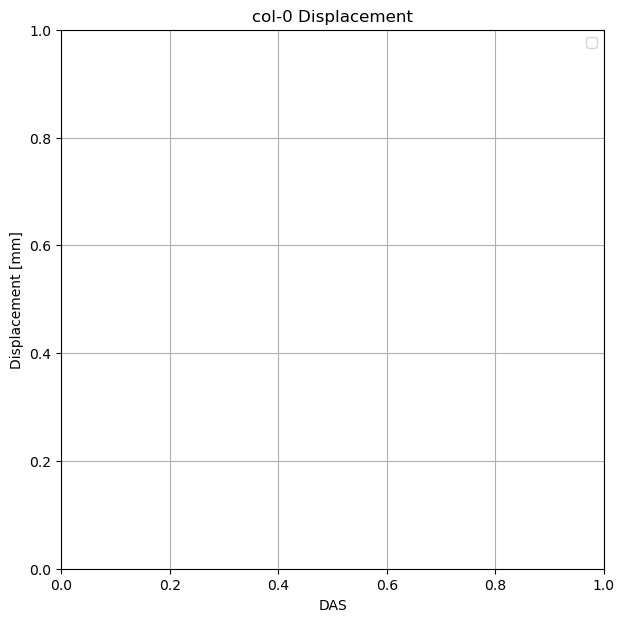

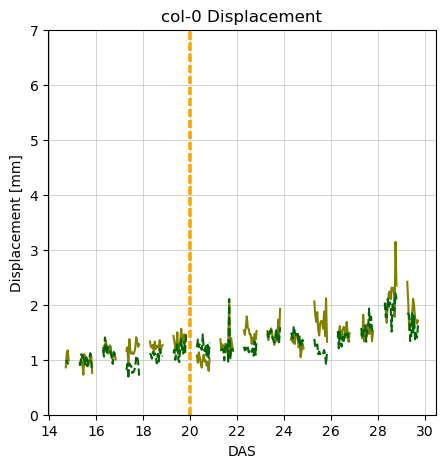

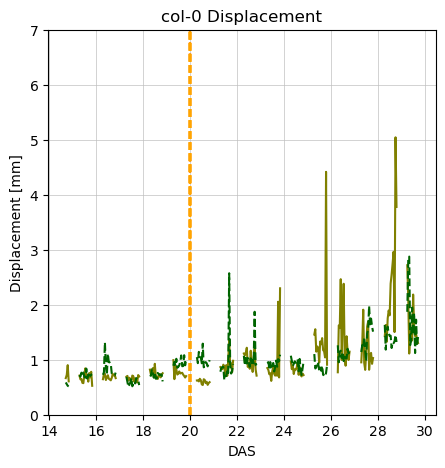

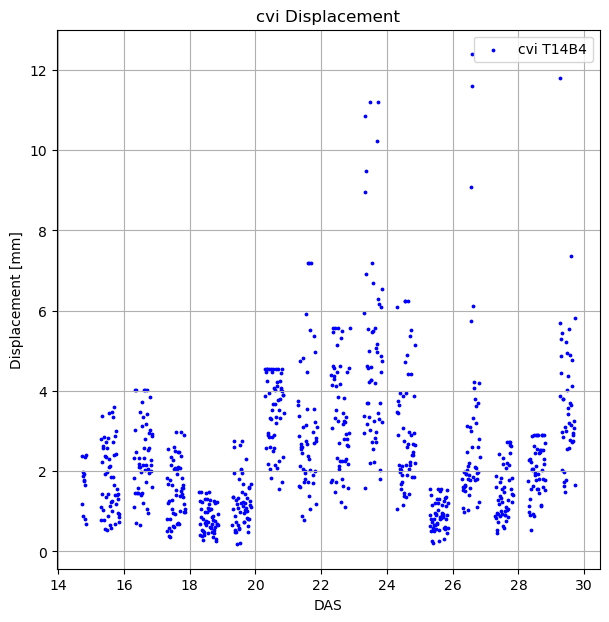

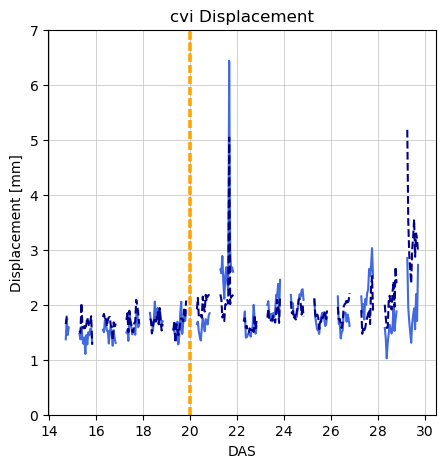

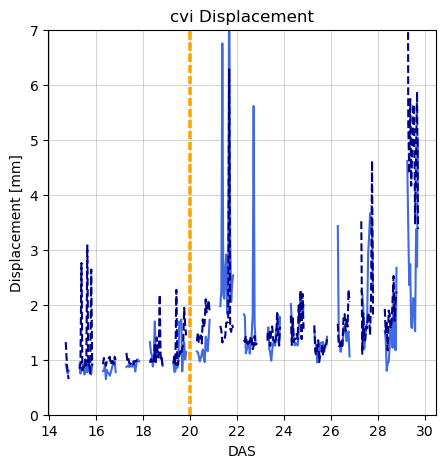

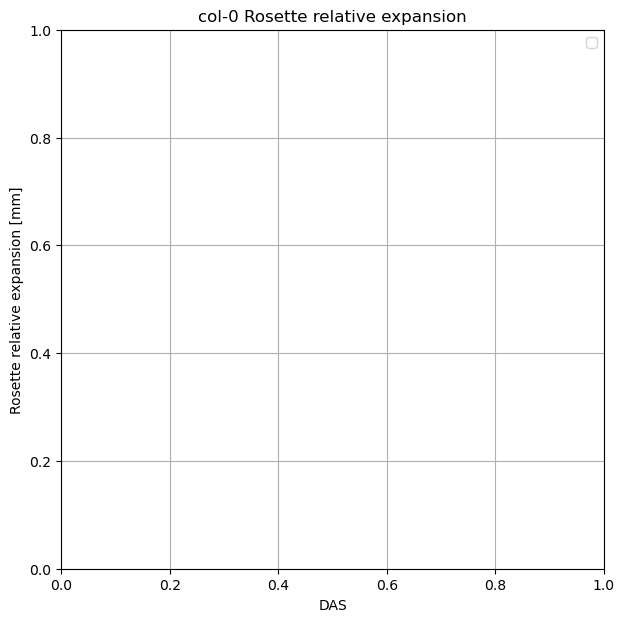

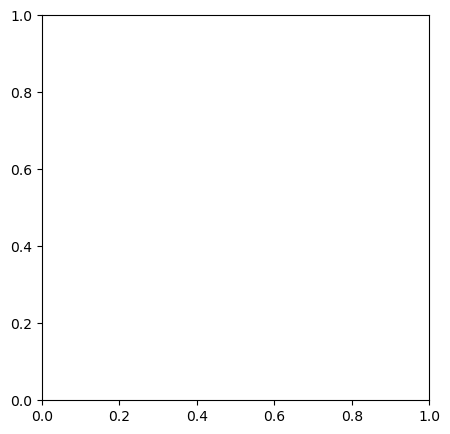

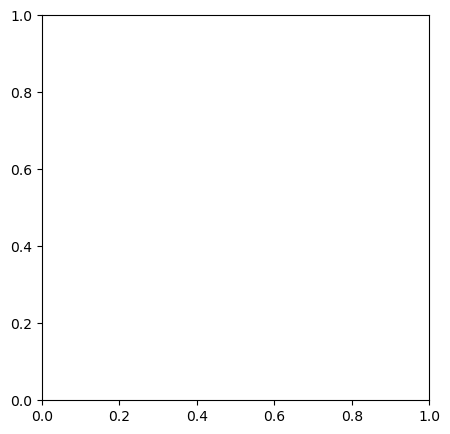

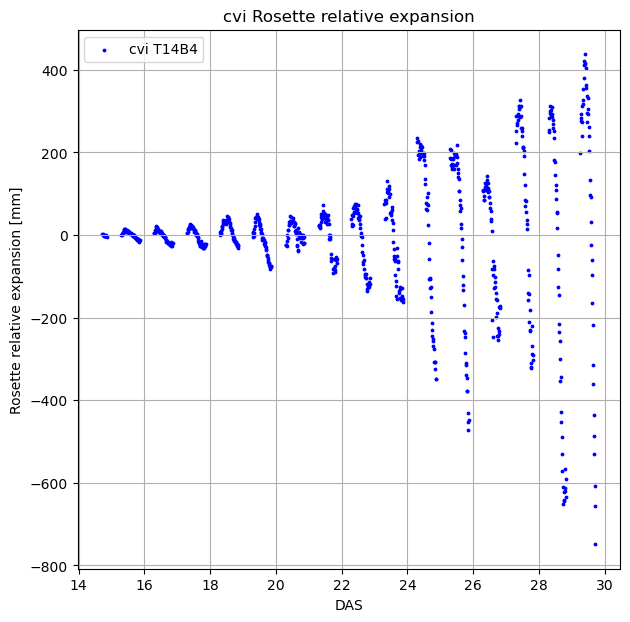

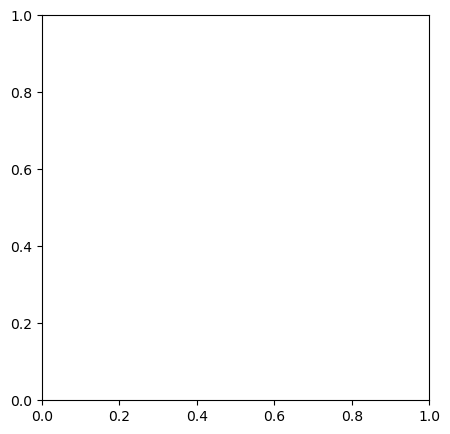

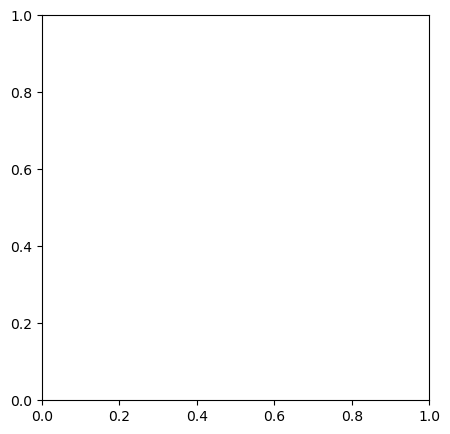

In [6]:
list_out = [x for x in os.listdir(csv_output) if (x[-3:]) == "csv"]
df_out = pd.DataFrame(list_out, columns=["filename"])
df_out[["name", "treatment", "measure"]] = df_out["filename"].str.split('_',expand=True)
df_out.loc[:,"measure"] = df_out.loc[:,"measure"].apply(lambda x: x[:-4])

measurements = np.unique(df_out.loc[:, "measure"])
treatments = np.unique(df_out.loc[:, "treatment"])
ecotypes = np.unique(df_out.loc[:, "name"])

colors = ["olive", "blue", "green", "deepskyblue"]
mins_hour = np.array([elem*60 for elem in range(23)])



for measure in measurements:
    for ecotype in ecotypes:
        y_min, y_max = 0, 0
        fig1, ax1 = plt.subplots(figsize=(7,7))
        fig2, ax2 = plt.subplots(figsize=(5,5))
        fig4, ax4 = plt.subplots(figsize=(5,5))
        
        
        for cnt in range(len(treatments)):
            treat = treatments[cnt]
            filename = df_out.loc[(df_out["measure"]==measure) & (df_out["name"]==ecotype) & (df_out["treatment"]==treat), "filename"].values[0]

            df_file = pd.read_csv(os.path.join(csv_output, filename ))
            
            time_col = {"date", "mins", "das"}
            positions = [elem for elem in df_file.columns if elem not in time_col]
            
            trays = np.unique([col[:3] for col in positions])
            min_das = np.unique(np.int32(np.floor(df_file.loc[:, "das"].values)))*24*60
            
            
            if measure == "Displacement":
            
                for cnt1 in range(len(min_das)):
                    cnt3 = 0
                    val_day = []
                    df_hourly = pd.DataFrame([],columns = ["mins", "mean", "std"])

#                     fig3, ax3 = plt.subplots(figsize=(7,7))

                    for cnt2 in range(len(mins_hour)-1):
                        mins_start = min_das[cnt1] + mins_hour[cnt2]
                        mins_stop = min_das[cnt1] + mins_hour[cnt2 + 1]
                        val_hour = df_file.loc[(df_file["mins"] >= mins_start) & (df_file["mins"] < mins_stop), positions].values

                        if len(val_hour) == 0: continue

                        val_day = np.concatenate((val_day, val_hour), axis=None)

                        df_hourly.loc[cnt3, "mins"] = min_das[cnt1] + mins_hour[cnt2]
                        df_hourly.loc[cnt3, "mean"] = np.mean(val_hour)
                        df_hourly.loc[cnt3, "std"] = np.std(val_hour)
                        cnt3+=1

                        
                        
                    up_lim = (df_hourly.loc[:, "mean"] + df_hourly.loc[:, "std"]).to_numpy()
                    down_lim = (df_hourly.loc[:, "mean"] - df_hourly.loc[:, "std"]).to_numpy()
                    time_lim = df_hourly.loc[:, "mins"].to_numpy()
                    

                    num_bins = 100
#                     ax3.hist(val_day,num_bins, label = "DAS = " + str(int(min_das[cnt1]/(24*60))) + " " + ecotype)
#                     ax3.set_xlabel(measure + " " + "[mm]")
#                     ax3.set_ylabel("Frequency")
#                     ax3.legend()
#                     plt.plot()
                    
                    if (treat == "control") & (ecotype == "col-0"):
                        color_mean= "olive"
                        line ="solid"
                
                    if (treat == "treated") & (ecotype == "col-0"):
                        color_mean= "darkgreen"
                        line ="dashed"
                        
                    if (treat == "control") & (ecotype == "cvi"):
                        color_mean= "royalblue"
                        line ="solid"
                
                    if (treat == "treated") & (ecotype == "cvi"):
                        color_mean= "darkblue"
                        line ="dashed"
               
                    ax2.plot(df_hourly.loc[:, "mins"]/(24*60), df_hourly.loc[:, "mean"], 
                             label = treat + " " + ecotype + " " + "mean", color=color_mean, linestyle=line)
                
                    ax4.plot(df_hourly.loc[:, "mins"]/(24*60), df_hourly.loc[:, "std"], 
                             label = treat + " " + ecotype + " " + "std", color=color_mean, linestyle=line)
                    
                    
                    ax2.set_ylabel(measure + " " + "[mm]")
                    ax2.set_xlabel("DAS")
                    ax2.set_title(ecotype + " " + measure)
                    ax2.grid(color="silver", linestyle="-", linewidth=0.5)
                    ax2.axvline(x=20, color="orange", linestyle="dashed", linewidth=1.5, label="Treatment day")
            #         ax2.legend()
                    ax2.grid(True)
                    ax2.set_ylim([0, 7])
                    
                    ax4.set_ylabel(measure + " " + "[mm]")
                    ax4.set_xlabel("DAS")
                    ax4.set_title(ecotype + " " + measure)
                    ax4.grid(color="silver", linestyle="-", linewidth=0.5)
                    ax4.axvline(x=20, color="orange", linestyle="dashed", linewidth=1.5, label="Treatment day")
            #         ax4.legend()
                    ax4.grid(True)
                    ax4.set_ylim([0, 7])
                
             
            for posn in positions:
                
                if posn == "T14B4":
                    ax1.scatter(df_file.loc[:, "das"], df_file.loc[:, posn], label = ecotype + " " + posn, s=3, color=colors[cnt])

            ax1.set_ylabel(measure + " " + "[mm]")
            ax1.set_xlabel("DAS")
            ax1.set_title(ecotype + " " + measure)
            ax1.grid(True)
            ax1.legend()
       
            
plt.show() 
 
